In [199]:
import pandas as pd
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB as gnb
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import plot_confusion_matrix as cf_matrix

In [200]:
glass_file_path = "glass.csv"
df = pd.read_csv(glass_file_path)

The features in this dataset are the refractive index and weight percentage of Na, Mg, Al, Si, K, Ca, Ba, and Fe.
The classes in this set include each type of glass which are: building windows, vehicle windows (non float processed), vehicle windows (float processed), containers, tableware and headlamps.

In [201]:
# calculating class priors
class_priors = []
num_classes = 7
for i in range(num_classes):
    class_priors.append(len(df[df['Type'] == i+1])/len(df))
class_priors

[0.32710280373831774,
 0.35514018691588783,
 0.0794392523364486,
 0.0,
 0.06074766355140187,
 0.04205607476635514,
 0.13551401869158877]

One of the prior values is 0. Which means there are no samples of that. So the distribution is uneven

In [202]:
# Entropy
entropy = 0.0
for i in range(len(class_priors)):
    if class_priors[i] != 0:
        entropy += -1*class_priors[i]*np.log2(class_priors[i])
entropy

2.176533992398201

In [203]:
# dictionary for fitted gaussian data
dict = {}
for i in range(num_classes):
    temp = df[df['Type'] == i+1].describe()
    dict.update({i+1 : temp})
dict.get(1)

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.0
mean,1.518718,13.242286,3.552429,1.163857,72.619143,0.447429,8.797286,0.012714,0.057000,1.0
std,0.002268,0.499301,0.247043,0.273158,0.569484,0.214879,0.574807,0.083838,0.089075,0.0
min,1.512150,12.450000,2.710000,0.290000,71.350000,0.000000,7.780000,0.000000,0.000000,1.0
25%,1.517540,12.825000,3.480000,1.112500,72.080000,0.200000,8.430000,0.000000,0.000000,1.0
50%,1.517835,13.195000,3.565000,1.230000,72.815000,0.560000,8.675000,0.000000,0.000000,1.0
75%,1.519560,13.525000,3.657500,1.327500,73.017500,0.590000,9.052500,0.000000,0.110000,1.0
max,1.526670,14.770000,4.490000,1.690000,73.700000,0.690000,10.170000,0.690000,0.310000,1.0


In [204]:
# Gaussian Probability Distribution Function
sc.stats.norm.pdf(0.2)

0.3910426939754559

In [205]:
# naive bayes
x = [[0.5, 0.7], [0.2, 0.3]]
y = [1, 2]
model = gnb()
model.fit(x,y)
p = [[0.2, 0.7]]
print(model.predict(p))

[1]


In [206]:
x = df.drop(["Type"], axis=1)
y = df["Type"]

In [207]:
x_train, x_test, y_train, y_test  = train_test_split(x, y, test_size=0.2, random_state=8290)
y_train

155    3
154    3
77     2
86     2
193    7
      ..
139    2
105    2
108    2
187    7
8      1
Name: Type, Length: 171, dtype: int64

In [208]:
linear_model = SVC(kernel="linear", C=5, gamma="auto")
linear_model.fit(x_train, y_train)

SVC(C=5, gamma='auto', kernel='linear')

In [209]:
radial_model = SVC(kernel="rbf", C=5, gamma="auto")
radial_model.fit(x_train, y_train)

SVC(C=5, gamma='auto')

In [210]:
linear_model.score(x_test, y_test)

0.6511627906976745

In [211]:
radial_model.score(x_test, y_test)

0.7674418604651163

The radial model performs a lot better than the linear model.

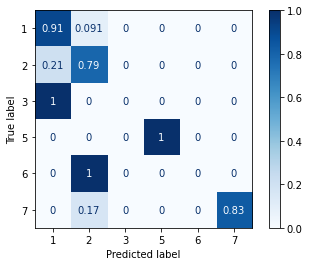

In [212]:
# plotting normalized confusion matrix
temp = y.unique()
confusion_matrix = cf_matrix(radial_model, x_test, y_test,display_labels=temp, cmap=plt.cm.Blues, normalize="true")

Text(0, 0.5, 'Performance')

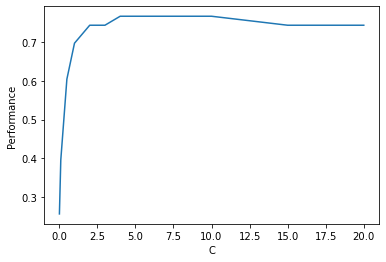

In [213]:
hyper_params = [0.01, 0.1, 0.5, 1, 2, 3, 4, 5, 7, 10, 15, 20]
perf = []
for i in hyper_params:
    model = SVC(kernel="rbf", C=i, gamma="auto")
    model.fit(x_train, y_train)
    temp = model.score(x_test, y_test)
    perf.append(temp)
plt.plot(hyper_params, perf)
plt.xlabel("C")
plt.ylabel("Performance")

In [214]:
radial_model.support_vectors_

array([[1.51720e+00, 1.33800e+01, 3.50000e+00, ..., 8.43000e+00,
        0.00000e+00, 0.00000e+00],
       [1.51775e+00, 1.28500e+01, 3.48000e+00, ..., 8.56000e+00,
        9.00000e-02, 2.20000e-01],
       [1.51736e+00, 1.27800e+01, 3.62000e+00, ..., 8.70000e+00,
        0.00000e+00, 0.00000e+00],
       ...,
       [1.51508e+00, 1.51500e+01, 0.00000e+00, ..., 8.34000e+00,
        6.30000e-01, 0.00000e+00],
       [1.51556e+00, 1.38700e+01, 0.00000e+00, ..., 9.41000e+00,
        8.10000e-01, 1.00000e-02],
       [1.52315e+00, 1.34400e+01, 3.34000e+00, ..., 8.83000e+00,
        0.00000e+00, 0.00000e+00]])

An improvement might be to try different C values with other kernels like sigmoid with C=5 since that seemed to perform best for radial.

In [215]:
sigmoid_model = SVC(kernel="sigmoid", C=5, gamma="auto")
sigmoid_model.fit(x_train, y_train)
sigmoid_model.score(x_test, y_test)

0.2558139534883721

That had a significantly worse performance.